In [1]:
%matplotlib inline
# Dependencies and Setup
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = ("./city_data.csv")
# with open(city_data) as csvfile:
#     csv_data = csv.load(csvfile)
    
ride_data = ("./ride_data.csv")
# with open(ride_data) as csvfile:
#     csv_data = csv.load(csvfile)

#Read the City and Ride Data               
city_data_df = pd.read_csv(city_data)
print(city_data_df.head())

ride_data_df = pd.read_csv(ride_data)
ride_data_df.head()

# Combine the data into a single dataset
pyber_df = pd.merge(city_data_df, ride_data_df, on="city", how="left")
pyber_df.head()

# Display the data table for preview
pyber_df.head()


           city  driver_count   type
0   Richardfort            38  Urban
1  Williamsstad            59  Urban
2   Port Angela            67  Urban
3    Rodneyfort            34  Urban
4   West Robert            39  Urban


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
# Read combine data into a single dataset
city_df = pd.DataFrame(city_data_df)
print(city_df)

ride_df = pd.DataFrame(ride_data_df)
print(ride_df)


                     city  driver_count      type
0             Richardfort            38     Urban
1            Williamsstad            59     Urban
2             Port Angela            67     Urban
3              Rodneyfort            34     Urban
4             West Robert            39     Urban
5            West Anthony            70     Urban
6             West Angela            48     Urban
7           Martinezhaven            25     Urban
8               Karenberg            22     Urban
9             Barajasview            26     Urban
10             Robertport            12     Urban
11           Joneschester            39     Urban
12                Leahton            17     Urban
13   West Christopherberg            32     Urban
14                Johnton            27     Urban
15           Reynoldsfurt            67     Urban
16             Port David             7     Urban
17    New Kimberlyborough            33     Urban
18            Carriemouth            52     Urban


In [3]:
## Bubble Plot of Ride Sharing Data
#Obtain the data frame the city type (urban, suburban, rural)
#group the data frame by city
urban_city_type = pyber_df[pyber_df["type"] == "Urban"].groupby([pyber_df["city"]])
suburban_city_type = pyber_df[pyber_df["type"] == "Suburban"].groupby([pyber_df["city"]])
rural_city_type = pyber_df[pyber_df["type"] == "Rural"].groupby([pyber_df["city"]])


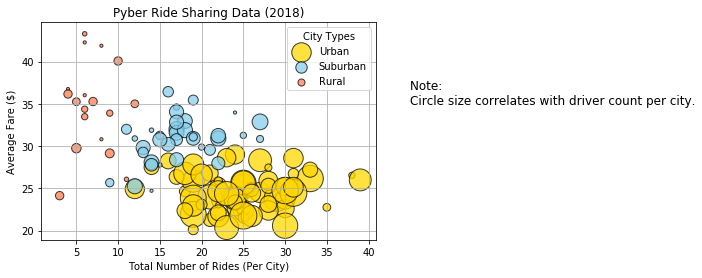

In [4]:
# Obtain the x and y coordinates for each of the three city types
#urban calculations of ride count (x), average fare(y), average driver count(s as in size)
x_urban = urban_city_type["ride_id"].count()
y_urban = urban_city_type["fare"].mean()
s_urban = urban_city_type["driver_count"].mean()

# Suburban calculations of ride count (x), average fare(y), average driver count(s as in size)
x_suburban = suburban_city_type["ride_id"].count()
y_suburban = suburban_city_type["fare"].mean()
s_suburban = suburban_city_type["driver_count"].mean()


# Rural calculations of ride count (x), average fare(y), average driver count (s as in size)
x_rural = rural_city_type["ride_id"].count()
y_rural = rural_city_type["fare"].mean()
s_rural = rural_city_type["driver_count"].mean()


# Build the scatter plots for each city types
plt.scatter(x_urban, y_urban, label = "Urban", s=s_urban * 10, color=["Gold"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(x_suburban, y_suburban, label = "Suburban", s=s_suburban  * 10, color=["SkyBlue"], edgecolor="black", alpha = 0.75, marker="o")
plt.grid()
plt.scatter(x_rural, y_rural, label = "Rural", s=s_rural * 10, color=["Coral"], edgecolor="black", alpha = 0.75, marker="o")

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2018)")

# Create a legend
plt.legend(fontsize = 10, title="City Types", loc="best") 

# Incorporate a text label regarding circle size
plt.text(45,35,"Note: \nCircle size correlates with driver count per city.", fontsize = 12)

# Save Figure
# Show plot
plt.show()


## Total Fares by City Type

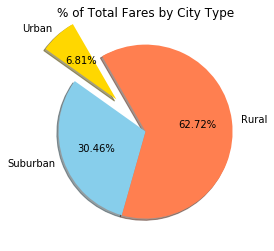

In [5]:
# Calculate Type Percents
type_groupped = pyber_df.groupby(["type"])
fare_sum = type_groupped["fare"].sum()

# Build Pie Chart
labels = ["Urban","Suburban", "Rural"]
explode = (0.5, 0, 0)
colors = ["gold", "SkyBlue", "Coral"]
plt.pie(fare_sum, explode=explode, labels=labels, colors=colors, autopct="%.2f%%", shadow=True, startangle=120)
plt.title("% of Total Fares by City Type")


# Save Figure
# Show Figure
plt.show()


## Total Rides by City Type

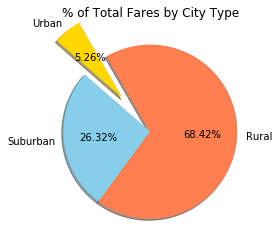

In [6]:
# Calculate Ride Percents
rides_count = type_groupped["ride_id"].count()

# Build Pie Chart
labels = ["Urban","Suburban", "Rural"]
explode = (0.5, 0, 0)
colors = ["gold", "SkyBlue", "Coral"]
plt.pie(rides_count, explode=explode, labels=labels, colors=colors, autopct="%.2f%%", shadow=True, startangle=120)
plt.title("% of Total Fares by City Type")

# Save Figure

# Show Figure
plt.show()


## Total Drivers by City Type

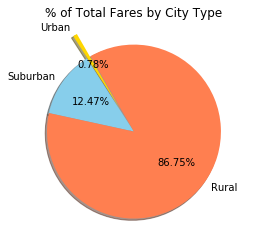

In [9]:
# Calculate Driver Percents
type_groupped_drivers = pyber_df.groupby(["type"])
drivers_sum = type_groupped_drivers["driver_count"].sum()

# Build Pie Charts
labels = ["Urban","Suburban", "Rural"]
explode = (0.3, 0, 0)
colors = ["gold", "SkyBlue", "Coral"]
plt.pie(drivers_sum, explode=explode, labels=labels, colors=colors, autopct="%.2f%%", shadow=True, startangle=120)
plt.title("% of Total Fares by City Type")

# Save Figure
# Show Figure
plt.show()

In [8]:
#Three Observable Trends
The result appeared to be that urban cities are consisted with the lowest average fare with highest city rides meanwhile,
suburban and rural cities have highest average fare.

The total fares by the urban city drivers is greater than suburban and rural with (62.72%) with lower average fare, while suburban and rural city have highest fares with lower rides.

Since Urban cities are for short travel, they are being traveled frequently in contrast to suburban and rural cities and consisted with larger quantities of drivers.

SyntaxError: invalid syntax (<ipython-input-8-9c8764f97c10>, line 2)